In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
df = pd.read_csv(r"C:\Users\srimullai\Downloads\archive (7)\adult.csv")  
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.shape

(48842, 15)

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')
Numerical Columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [9]:
df.replace(" ?", np.nan, inplace=True)
df.dropna(inplace=True)


In [11]:
le = LabelEncoder()
if 'sex' in df.columns:
    df['sex'] = le.fit_transform(df['sex'])
else:
    print("Column 'sex' not found in DataFrame")
    
if 'income' in df.columns:
    df['income'] = le.fit_transform(df['income'])
else:
    print("Column 'income' not found in DataFrame")


Column 'sex' not found in DataFrame


In [12]:
df = pd.get_dummies(df, columns=[
    'workclass', 'education', 'marital-status',
    'occupation', 'relationship', 'race', 'native-country'
], drop_first=True)


In [13]:
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [15]:
df_before = pd.read_csv(r"C:\Users\srimullai\Downloads\archive (7)\adult.csv")
df_before[numerical_cols].describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
df[numerical_cols].describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04
mean,2.281092e-16,-5.848208e-17,-9.208746e-17,1.047440e-17,-1.018345e-17,4.466169e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.578629e+00,-1.679680e+00,-3.531030e+00,-1.448035e-01,-2.171271e-01,-3.181452e+00
25%,-7.763164e-01,-6.828752e-01,-4.193353e-01,-1.448035e-01,-2.171271e-01,-3.408696e-02
50%,-1.198790e-01,-1.090844e-01,-3.037346e-02,-1.448035e-01,-2.171271e-01,-3.408696e-02
75%,6.824334e-01,4.543232e-01,7.475502e-01,-1.448035e-01,-2.171271e-01,3.694214e-01
max,3.745808e+00,1.231723e+01,2.303397e+00,1.327438e+01,1.059179e+01,4.727312e+00


In [18]:
df.to_csv("adult_income_preprocessed.csv", index=False)


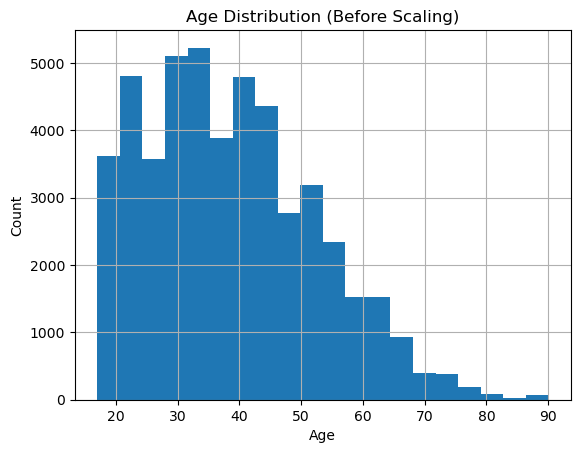

In [19]:
df_before['age'].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution (Before Scaling)")
plt.show()


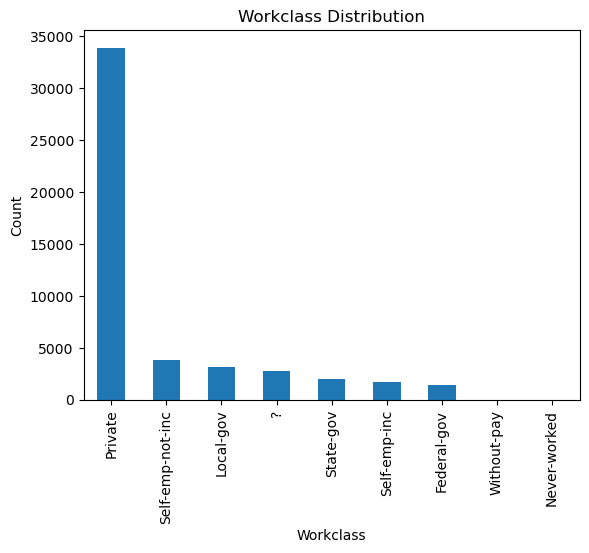

In [20]:
df_before['workclass'].value_counts().plot(kind='bar')
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.title("Workclass Distribution")
plt.show()


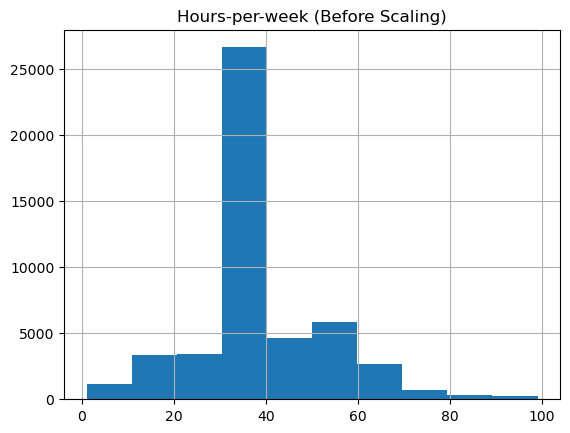

In [21]:
df_before['hours-per-week'].hist()
plt.title("Hours-per-week (Before Scaling)")
plt.show()


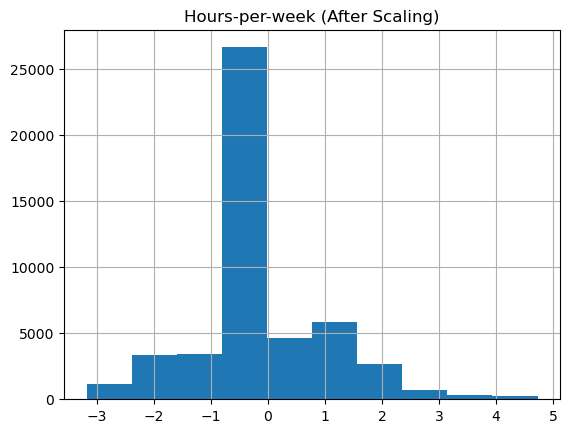

In [22]:
df['hours-per-week'].hist()
plt.title("Hours-per-week (After Scaling)")
plt.show()


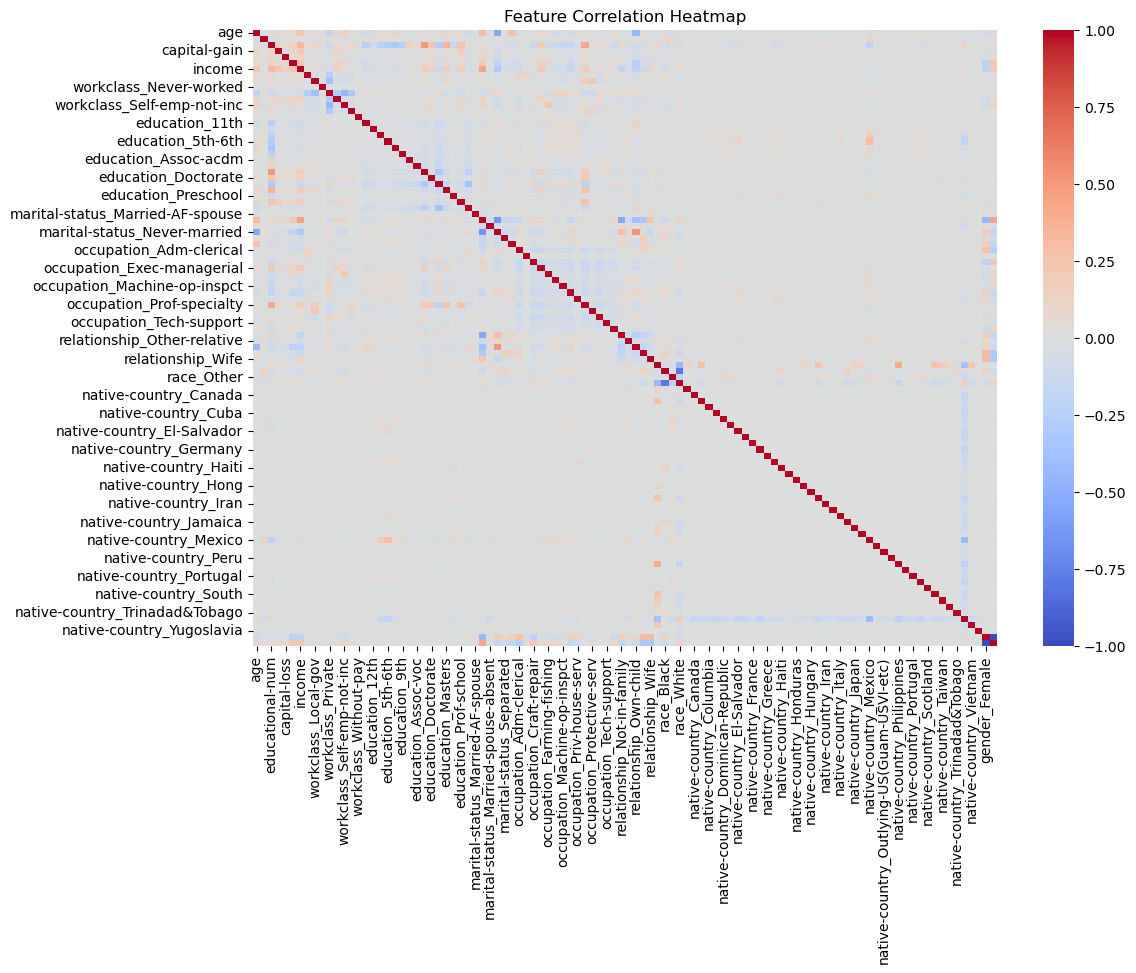

In [26]:

df_numeric = df.copy()
categorical_columns = df_numeric.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:
 df_numeric = pd.get_dummies(df_numeric, columns=categorical_columns)
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()